In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.metrics as metrics

from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("https://github.com/Psurabat/IT-533/raw/main/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")

In [4]:
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [5]:
data['RESULT'] = data['RESULT'].astype('category')
data['RESULT'] = data['RESULT'].cat.codes

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [7]:
#Standardize

x = data['RESULT'].values
scaler = StandardScaler()

data['RESULT'] = scaler.fit_transform(np.reshape(x,(-1,1)))
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,3.294312,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,3.294312,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [8]:
bins = np.linspace(data['RESULT'].min(),data['RESULT'].max(),6)

labels = ['xs','s','m','l','xl']

data['RESULT'] = pd.cut(data['RESULT'] , bins=bins, labels=labels, include_lowest=True)

In [9]:
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,xs,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,xs,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,xl,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,xl,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,xs,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [10]:
data.LOCATION.replace(np.nan,'null',inplace=True)

In [11]:
data['LOCATION'].isnull().sum()

0

In [14]:
data['NUMBER OF MOSQUITOES'].describe()

count    29489.000000
mean        12.353827
std         15.261187
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max         77.000000
Name: NUMBER OF MOSQUITOES, dtype: float64

In [15]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

In [17]:
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,xs,CULEX PIPIENS/RESTUANS,NaN,NaN,null
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,xs,CULEX PIPIENS/RESTUANS,NaN,NaN,null
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,xl,CULEX PIPIENS/RESTUANS,NaN,NaN,null
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,xl,CULEX PIPIENS/RESTUANS,NaN,NaN,null
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,xs,CULEX PIPIENS/RESTUANS,NaN,NaN,null


In [18]:
data[['SEASON YEAR','NUMBER OF MOSQUITOES','WEEK']].corr()

,SEASON YEAR,NUMBER OF MOSQUITOES,WEEK
SEASON YEAR,1.000000,-0.018555,0.005214
NUMBER OF MOSQUITOES,-0.018555,1.000000,-0.049827
WEEK,0.005214,-0.049827,1.000000


In [20]:
print([i for i in data.columns if data[i].dtype=='object'])

['BLOCK', 'TRAP', 'TRAP_TYPE', 'TEST DATE', 'SPECIES', 'LOCATION']


In [31]:
data1 = data[['BLOCK', 'TRAP', 'TRAP_TYPE', 'TEST DATE', 'SPECIES', 'LOCATION','RESULT']]
data1.head()

,BLOCK,TRAP,TRAP_TYPE,TEST DATE,SPECIES,LOCATION,RESULT
0,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,CULEX PIPIENS/RESTUANS,null,xs
1,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,CULEX PIPIENS/RESTUANS,null,xs
2,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,CULEX PIPIENS/RESTUANS,null,xl
3,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,CULEX PIPIENS/RESTUANS,null,xl
4,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,CULEX PIPIENS/RESTUANS,null,xs


In [32]:
data1['BLOCK'] = data1['BLOCK'].astype('category')
data1['BLOCK'] = data1['BLOCK'].cat.codes

data1['TRAP'] = data1['TRAP'].astype('category')
data1['TRAP'] = data1['TRAP'].cat.codes

data1['TRAP_TYPE'] = data1['TRAP_TYPE'].astype('category')
data1['TRAP_TYPE'] = data1['TRAP_TYPE'].cat.codes

data1['TEST DATE'] = data1['TEST DATE'].astype('category')
data1['TEST DATE'] = data1['TEST DATE'].cat.codes

data1['SPECIES'] = data1['SPECIES'].astype('category')
data1['SPECIES'] = data1['SPECIES'].cat.codes

data1['LOCATION'] = data1['LOCATION'].astype('category')
data1['LOCATION'] = data1['LOCATION'].cat.codes

In [33]:
data1.head()

,BLOCK,TRAP,TRAP_TYPE,TEST DATE,SPECIES,LOCATION,RESULT
0,1,171,1,284,2,162,xs
1,1,171,1,260,2,162,xs
2,1,174,1,190,2,162,xl
3,1,169,1,190,2,162,xl
4,97,106,1,260,2,162,xs


In [34]:
X = data1.drop('RESULT',axis=1)
y = data1['RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23591, 6), (5898, 6), (23591,), (5898,))

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  91.75991861648016 %


In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred

array(['xs', 'xs', 'xs', ..., 'xs', 'xs', 'xs'], dtype=object)

<Axes: >

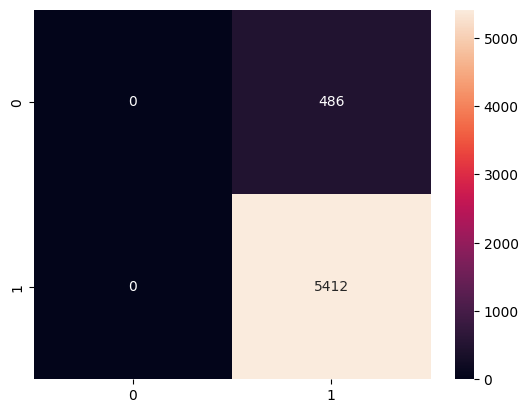

In [43]:
# Next, the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')


In [44]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    positive       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9009833841980333

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    positive       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



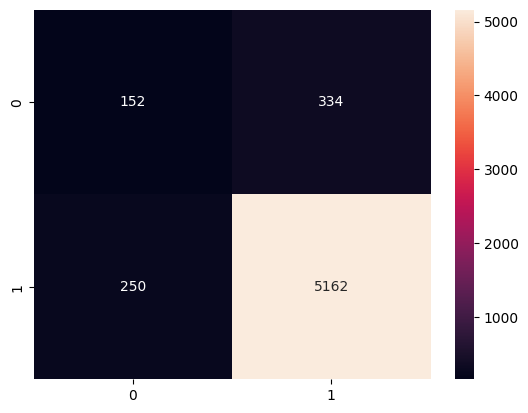

In [48]:
sns.heatmap(confusion_matrix( y_test,y_pred),annot=True,fmt='d')
print(metrics.classification_report(y_test, y_pred, labels=['negative', 'positive']))

In [49]:
from sklearn.cluster import KMeans

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


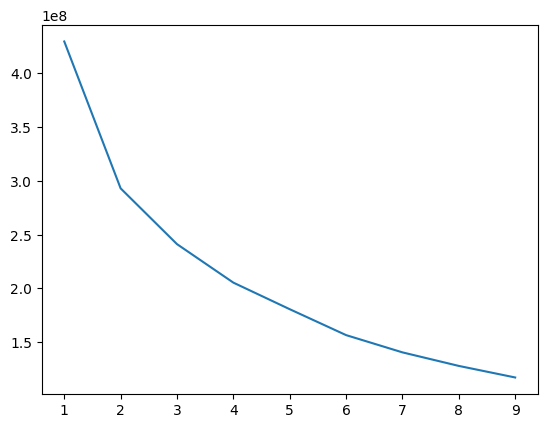

In [50]:
# Elbow method

def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X,maxK=10)

In [51]:
KMeans(n_clusters=2, ).fit(X)

KMeans(n_clusters=2)